Module 6 Challenge - Add features to code based on customer feedback:


1) Weather description to the pop-up markers 

2) Notation in the search criteria to indicate if it is raining or snowing for customers who are making travel decisions in real-time

3) Map that shows the directions for customers’ travel itinerary

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the time module.
import time
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
#type(lats)
#type(lat_lngs)

Challenge Part 1.2 Generate a set of 1,500 random latitudes and longitudes.

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
type(coordinates)

list

Challenge Part 1.3 Get the nearest city using the citipy module

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    #country = citipy.nearest_city(coordinate[0], coordinate[1]).country_code
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

587

In [5]:
type(cities)

list

Challenge Part 1.4 Perform an API call with the OpenWeatherMap.

Retrieve the following information from the API call {Latitude, longitude, Maximum temperature, 
Percent cloudiness, Wind speed, Weather description (e.g., clouds, fog, light rain, clear sky),
The amount of rainfall over the last hour (1 hr), The amount of snowfall over the last hour (1 hr)}

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ee665a25356ae395168c7430eaefc45b


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # print(city_url)
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    # Handle API Request Errors with try-except Blocks
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_description = city_weather["weather"][0]["description"]
        print(f"city description = {city_description} ...")
        try: 
            city_rain = city_weather["rain"]["1h"]
        except:
            city_rain = 0.0
        try:
            city_snow = city_weather["snow"]["1h"]
        except:
            city_snow = 0.0
        city_country = city_weather["sys"]["country"] 
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Description": city_description,
                          "Rain": city_rain,
                          "Snow": city_snow,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print(f"{city} not found! Skipping city ...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
city description = light rain ...
Processing Record 2 of Set 1 | baykit
city description = overcast clouds ...
Processing Record 3 of Set 1 | lebu
city description = few clouds ...
Processing Record 4 of Set 1 | rikitea
city description = broken clouds ...
Processing Record 5 of Set 1 | pisco
city description = few clouds ...
Processing Record 6 of Set 1 | talnakh
city description = overcast clouds ...
Processing Record 7 of Set 1 | mataura
city description = broken clouds ...
Processing Record 8 of Set 1 | hermanus
city description = scattered clouds ...
Processing Record 9 of Set 1 | ushuaia
city description = few clouds ...
Processing Record 10 of Set 1 | vila velha
city description = clear sky ...
Processing Record 11 of Set 1 | butaritari
city description = clear sky ...
Processing Record 12 of Set 1 | arlit
city description = clear sky ...
Processing Record 13 of Set 1 | buchanan


city description = clear sky ...
Processing Record 7 of Set 3 | xuddur
city description = scattered clouds ...
Processing Record 8 of Set 3 | saskylakh
city description = few clouds ...
Processing Record 9 of Set 3 | muros
city description = clear sky ...
Processing Record 10 of Set 3 | port hardy
city description = light rain ...
Processing Record 11 of Set 3 | novo aripuana
city description = broken clouds ...
Processing Record 12 of Set 3 | inirida
city description = overcast clouds ...
Processing Record 13 of Set 3 | airai
city description = clear sky ...
Processing Record 14 of Set 3 | zeya
city description = clear sky ...
Processing Record 15 of Set 3 | coihaique
city description = light intensity shower rain ...
Processing Record 16 of Set 3 | hovd
city description = clear sky ...
Processing Record 17 of Set 3 | port alfred
city description = clear sky ...
Processing Record 18 of Set 3 | namibe
city description = clear sky ...
Processing Record 19 of Set 3 | new norfolk
city des

city description = clear sky ...
Processing Record 12 of Set 5 | areosa
city description = clear sky ...
Processing Record 13 of Set 5 | orlik
city description = scattered clouds ...
Processing Record 14 of Set 5 | fairbanks
city description = light intensity drizzle ...
Processing Record 15 of Set 5 | palana
city description = clear sky ...
Processing Record 16 of Set 5 | arraial do cabo
city description = clear sky ...
Processing Record 17 of Set 5 | katsuura
city description = broken clouds ...
Processing Record 18 of Set 5 | pemangkat
city description = overcast clouds ...
Processing Record 19 of Set 5 | leh
city description = clear sky ...
Processing Record 20 of Set 5 | upernavik
city description = scattered clouds ...
Processing Record 21 of Set 5 | port antonio
city description = few clouds ...
Processing Record 22 of Set 5 | salo
city description = few clouds ...
Processing Record 23 of Set 5 | haines junction
city description = few clouds ...
Processing Record 24 of Set 5 | k

city description = scattered clouds ...
Processing Record 17 of Set 7 | chumikan
city description = broken clouds ...
Processing Record 18 of Set 7 | shelburne
city description = broken clouds ...
Processing Record 19 of Set 7 | revelstoke
city description = overcast clouds ...
Processing Record 20 of Set 7 | alofi
city description = broken clouds ...
Processing Record 21 of Set 7 | lompoc
city description = clear sky ...
Processing Record 22 of Set 7 | tiksi
city description = clear sky ...
Processing Record 23 of Set 7 | jaque
city description = light rain ...
Processing Record 24 of Set 7 | kibala
city description = overcast clouds ...
Processing Record 25 of Set 7 | port lincoln
city description = scattered clouds ...
Processing Record 26 of Set 7 | ifakara
city description = scattered clouds ...
Processing Record 27 of Set 7 | college
city description = light intensity drizzle ...
Processing Record 28 of Set 7 | heihe
city description = broken clouds ...
Processing Record 29 of Se

city description = clear sky ...
Processing Record 29 of Set 11 | darhan
city description = overcast clouds ...
Processing Record 30 of Set 11 | manggar
city description = light rain ...
Processing Record 31 of Set 11 | champerico
city description = light rain ...
Processing Record 32 of Set 11 | saltillo
city description = broken clouds ...
Processing Record 33 of Set 11 | omboue
city description = overcast clouds ...
Processing Record 34 of Set 11 | nuuk
city description = overcast clouds ...
Processing Record 35 of Set 11 | caxito
city description = broken clouds ...
Processing Record 36 of Set 11 | trento
city description = clear sky ...
Processing Record 37 of Set 11 | bure
city description = light rain ...
Processing Record 38 of Set 11 | campo formoso
city description = scattered clouds ...
Processing Record 39 of Set 11 | ye
ye not found! Skipping city ...
Processing Record 40 of Set 11 | buturlino
city description = few clouds ...
Processing Record 41 of Set 11 | veracruz
city

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Description,Rain,Snow,Country,Date
0,Jamestown,42.10,-79.24,70.00,88,40,6.93,light rain,0.76,0.0,US,2020-06-23 00:36:35
1,Baykit,61.67,96.37,70.25,57,89,1.59,overcast clouds,0.00,0.0,RU,2020-06-23 00:38:40
2,Lebu,-37.62,-73.65,49.03,77,14,6.76,few clouds,0.00,0.0,CL,2020-06-23 00:38:41
3,Rikitea,-23.12,-134.97,69.51,58,54,16.06,broken clouds,0.00,0.0,PF,2020-06-23 00:38:41
4,Pisco,-13.70,-76.22,63.00,82,20,4.70,few clouds,0.00,0.0,PE,2020-06-23 00:36:43
5,Talnakh,69.49,88.40,57.20,62,99,17.90,overcast clouds,0.00,0.0,RU,2020-06-23 00:38:41
6,Mataura,-46.19,168.86,50.11,63,51,1.12,broken clouds,0.00,0.0,NZ,2020-06-23 00:38:41
7,Hermanus,-34.42,19.23,55.00,86,30,5.99,scattered clouds,0.00,0.0,ZA,2020-06-23 00:37:46
8,Ushuaia,-54.80,-68.30,33.80,86,20,3.36,few clouds,0.00,0.0,AR,2020-06-23 00:38:42
9,Vila Velha,-20.33,-40.29,66.99,93,0,2.24,clear sky,0.00,0.0,BR,2020-06-23 00:37:48


In [9]:
new_column_order = ["City", "Country", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Description", "Rain", "Snow"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Description,Rain,Snow
0,Jamestown,US,42.10,-79.24,70.00,88,40,6.93,light rain,0.76,0.0
1,Baykit,RU,61.67,96.37,70.25,57,89,1.59,overcast clouds,0.00,0.0
2,Lebu,CL,-37.62,-73.65,49.03,77,14,6.76,few clouds,0.00,0.0
3,Rikitea,PF,-23.12,-134.97,69.51,58,54,16.06,broken clouds,0.00,0.0
4,Pisco,PE,-13.70,-76.22,63.00,82,20,4.70,few clouds,0.00,0.0
5,Talnakh,RU,69.49,88.40,57.20,62,99,17.90,overcast clouds,0.00,0.0
6,Mataura,NZ,-46.19,168.86,50.11,63,51,1.12,broken clouds,0.00,0.0
7,Hermanus,ZA,-34.42,19.23,55.00,86,30,5.99,scattered clouds,0.00,0.0
8,Ushuaia,AR,-54.80,-68.30,33.80,86,20,3.36,few clouds,0.00,0.0
9,Vila Velha,BR,-20.33,-40.29,66.99,93,0,2.24,clear sky,0.00,0.0


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/WeatherPy_database.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

Section 6.3.1 Plot Latitude vs. Temperature

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Import the time module.
import time
# Get today's date in seconds.

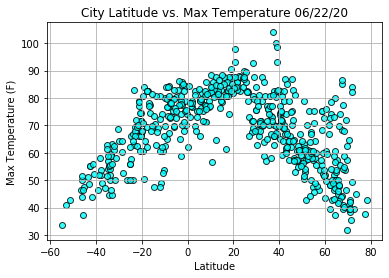

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            color="cyan", edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Challenge1-Temperature.png")

# Show plot.
plt.show()

Section 6.3.2 Plot Latitude vs. Humidity

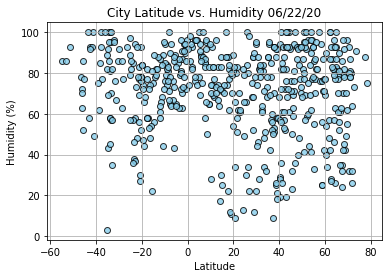

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            color="skyblue", edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Challenge2-Humidity.png")

# Show plot.
plt.show()

Section 6.3.3 Plot Latitude vs. Cloudiness

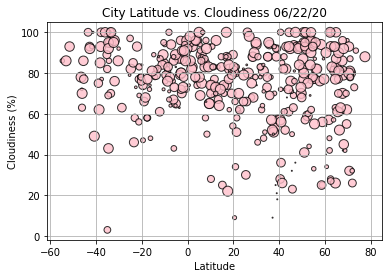

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            cloudiness,
            color="pink", edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Challenge3-Cloudiness.png")

# Show plot.
plt.show()

Section 6.3.4 Plot Latitude vs. Wind Speed

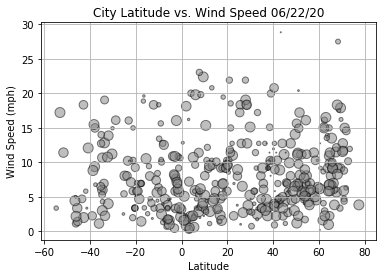

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            cloudiness,
            color="grey", edgecolor="black", linewidths=1, marker="o",
            alpha=0.5, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Challenge4-Windspeed.png")

# Show plot.
plt.show()

Section 6.4.2 Find the Correlation Between Latitude and Maximum Temperature

In [17]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [18]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere


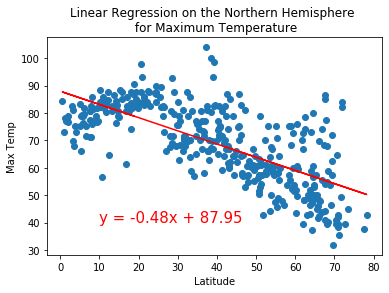

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp', (10,40))

Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

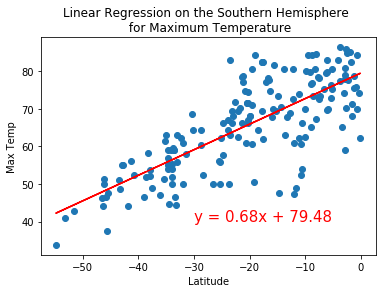

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-30,40))

Section 6.4.3 Find the Correlation Between Latitude and Maximum Temperature

Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

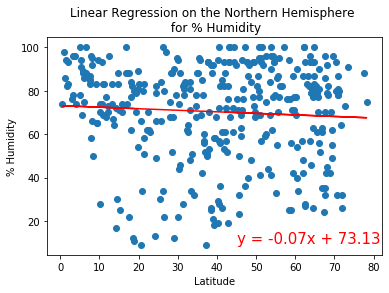

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity', (45,10))

Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

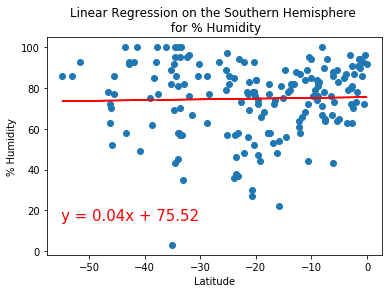

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity',(-55,15))

Section 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness


Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

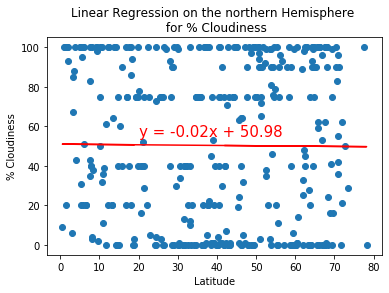

In [34]:
# Linear regression on the northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(20,55))

Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

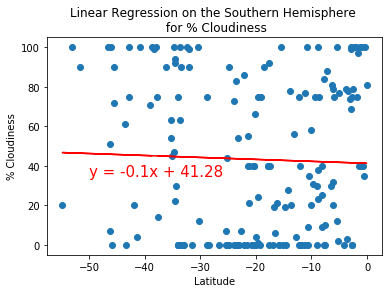

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(-50,35))

6.4.5 Find the Correlation Between Latitude and Wind Speed

Perform Linear Regression on the Wind Speed for the Northern Hemisphere

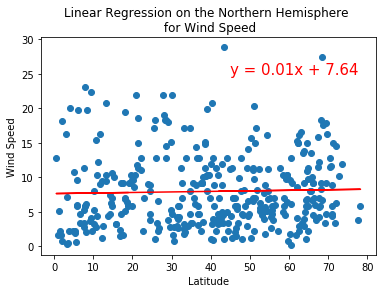

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed', (45,25))

Perform Linear Regression on the Wind Speed for the Southern Hemisphere

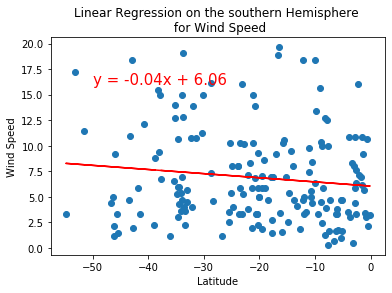

In [31]:
# Linear regression on the southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the southern Hemisphere \n for Wind Speed', 
                       'Wind Speed', (-50,16))